## Ujian Perbaikan Nilai Modul 2
Nama    : Sapto Aji Pamungkas
Kelas   : Job Connector Data Science Batch 7

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Like usual, just read the data first

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('auto_imports.csv')

In [4]:
df.head()

,Symboling,Normalized-Loss,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      201 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         201 non-null object
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null object
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 201 non-null object
Stroke               201 non-null object
Compression-ratio    201 non-null float64
Horsepower           201 non-nul

In [6]:
df.describe()

,Symboling,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Size,Compression-ratio,City-MPG,Highway-MPG,Price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [7]:
df.select_dtypes('object').describe()

,Normalized-Loss,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Engine-Type,Cylinders,Fuel-System,Bore,Stroke,Horsepower,Peak-rpm
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500
freq,37,32,181,165,113,94,118,198,145,157,92,23,19,19,36


In [8]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((((df[i].isna().sum())/(len(df)))*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2).values])
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Symboling,int64,0,0.0,6,"[1, 0]"
1,Normalized-Loss,object,0,0.0,52,"[110, 168]"
2,Make,object,0,0.0,22,"[peugot, mercury]"
3,Fuel-Type,object,0,0.0,2,"[gas, diesel]"
4,Aspiration,object,0,0.0,2,"[std, turbo]"
5,Num-of-Doors,object,0,0.0,3,"[?, two]"
6,Body-Style,object,0,0.0,5,"[convertible, sedan]"
7,Drive-Wheels,object,0,0.0,3,"[fwd, 4wd]"
8,Engine-Location,object,0,0.0,2,"[front, rear]"
9,Wheel-Base,float64,0,0.0,52,"[99.2, 95.3]"


If you realize, some columns that are numerical is listed as object data type. This is because in the data there is '?' value that become the placeholder of Null value. Now, replace all the '?' in every columns as NaN value (np.nan).

In [9]:
def ganti (col):
    if col =='?':
        return np.nan
    else :
        return col

cols = list(df.columns)
for i in range (len(cols)):
    df[cols[i]] = df[cols[i]].apply(ganti)

Now convert these following columns into float object:
- Num-of-Doors
- Cylinders
- Bore
- Stroke
- Horsepower
- Peak-rpm

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      164 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         199 non-null object
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null object
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 197 non-null object
Stroke               197 non-null object
Compression-ratio    201 non-null float64
Horsepower           199 non-nul

In [11]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((((df[i].isna().sum())/(len(df)))*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2).values])
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Symboling,int64,0,0.00,6,"[2, 0]"
1,Normalized-Loss,object,37,18.41,51,"[94, 153]"
2,Make,object,0,0.00,22,"[nissan, audi]"
3,Fuel-Type,object,0,0.00,2,"[diesel, gas]"
4,Aspiration,object,0,0.00,2,"[turbo, std]"
5,Num-of-Doors,object,2,1.00,2,"[two, four]"
6,Body-Style,object,0,0.00,5,"[hardtop, wagon]"
7,Drive-Wheels,object,0,0.00,3,"[4wd, rwd]"
8,Engine-Location,object,0,0.00,2,"[front, rear]"
9,Wheel-Base,float64,0,0.00,52,"[105.8, 95.3]"


There are 2 columns that would be nice if they are represented as numerical value rather than written; Num-of-Doors and Cylinders. For this 2 columns, replace the string as numerical value (Ex: if it is two then replace it with 2, etc.)

In [12]:
def gantiangka (col):
    if col == 'two':
        return 2
    elif col == 'three':
        return 3
    elif col == 'four':
        return 4
    elif col == 'five':
        return 5
    elif col == 'six':
        return 6
    elif col== 'eight':
        return 8
    elif col == 'twelve':
        return 12
    else :
        return col
    
df['Num-of-Doors']= df['Num-of-Doors'].apply(gantiangka)
df['Cylinders']= df['Cylinders'].apply(gantiangka)

In [13]:
df.head() 

,Symboling,Normalized-Loss,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Now convert these following columns into float object:
- Num-of-Doors
- Cylinders
- Bore
- Stroke
- Horsepower
- Peak-rpm

In [14]:
df['Num-of-Doors'] = df['Num-of-Doors'].astype(float)
df['Cylinders'] = df['Cylinders'].astype(float)
df['Bore'] = df['Bore'].astype(float)
df['Stroke'] = df['Stroke'].astype(float)
df['Horsepower'] = df['Horsepower'].astype(float)
df['Peak-rpm'] = df['Peak-rpm'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
Symboling            201 non-null int64
Normalized-Loss      164 non-null object
Make                 201 non-null object
Fuel-Type            201 non-null object
Aspiration           201 non-null object
Num-of-Doors         199 non-null float64
Body-Style           201 non-null object
Drive-Wheels         201 non-null object
Engine-Location      201 non-null object
Wheel-Base           201 non-null float64
Length               201 non-null float64
Width                201 non-null float64
Height               201 non-null float64
Curb-Weight          201 non-null int64
Engine-Type          201 non-null object
Cylinders            201 non-null float64
Engine-Size          201 non-null int64
Fuel-System          201 non-null object
Bore                 197 non-null float64
Stroke               197 non-null float64
Compression-ratio    201 non-null float64
Horsepower           199 non

We do not need the Symboling and Normalized Columns, so drop these 2 columns. Then, filter the data to acquire the only the row that contain NaN.

In [16]:
df = df.drop(columns =['Symboling',
 'Normalized-Loss'])

In [17]:
df_nan = df[df.isnull().any(axis=1)].index

In [18]:
df.iloc[df_nan]

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
26,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,4.0,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
52,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2.0,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
53,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2.0,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
54,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2.0,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2.0,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645
60,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,4.0,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
126,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4.0,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4.0,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


Now we will try to fill the NaN value for some of the columns.
For the NaN in Num-of-Doors, Bore, and  Stroke columns fill the NaN value with the mean of their columns with the similar value in the Make and Body-Style columns. *e.g if you have NaN in num-of-doors with hatchback renault car then fill the NaN with the num-of-doors mean of the hatchback renault car. 

In [19]:
primary_mean = df.groupby(['Make','Body-Style']).mean()['Num-of-Doors']
                                                        
def fill_average_door(cols):
    if pd.isna(cols['Num-of-Doors']):
        return ((primary_mean[cols['Make']][cols['Body-Style']]))
    else:
        return (cols['Num-of-Doors'])
df['Num-of-Doors'] = df[['Num-of-Doors','Make','Body-Style']].apply(fill_average_door, axis=1)

primary_mean_bore = df.groupby(['Make','Body-Style']).mean()['Bore']
def fill_average_bore(cols):
    if pd.isna(cols['Bore']):
        return ((primary_mean_bore[cols['Make']][cols['Body-Style']]))
    else:
        return (cols['Bore'])
df['Bore'] = df[['Bore','Make','Body-Style']].apply(fill_average_bore, axis=1)

primary_mean_stroke = df.groupby(['Make','Body-Style']).mean()['Stroke']
def fill_average_stroke(cols):
    if pd.isna(cols['Stroke']):
        return ((primary_mean_stroke[cols['Make']][cols['Body-Style']]))
    else:
        return (cols['Stroke'])
df['Stroke'] = df[['Stroke','Make','Body-Style']].apply(fill_average_stroke, axis=1)

Let's see once more our previous dataframe which contain the NaN to make sure that it have been filled properly

In [20]:
df.iloc[df_nan]

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price
26,dodge,gas,turbo,4.0,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,4.0,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
52,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2.0,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,10945
53,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2.0,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,11845
54,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2.0,70,4bbl,3.21,3.27,9.4,101.0,6000.0,17,23,13645
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2.0,80,mpfi,3.21,3.27,9.4,135.0,6000.0,16,23,15645
60,mazda,diesel,std,4.0,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,4.0,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
126,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4.0,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4.0,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


Now, drop all the rest row that contain the NaN value

In [21]:
df = df.dropna()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 200
Data columns (total 24 columns):
Make                 199 non-null object
Fuel-Type            199 non-null object
Aspiration           199 non-null object
Num-of-Doors         199 non-null float64
Body-Style           199 non-null object
Drive-Wheels         199 non-null object
Engine-Location      199 non-null object
Wheel-Base           199 non-null float64
Length               199 non-null float64
Width                199 non-null float64
Height               199 non-null float64
Curb-Weight          199 non-null int64
Engine-Type          199 non-null object
Cylinders            199 non-null float64
Engine-Size          199 non-null int64
Fuel-System          199 non-null object
Bore                 199 non-null float64
Stroke               199 non-null float64
Compression-ratio    199 non-null float64
Horsepower           199 non-null float64
Peak-rpm             199 non-null float64
City-MPG             199 

As I am interested in the car price, I want to see if the brand of the car ('Make' column) would affecting the price. Let's try to create a visualization of it 

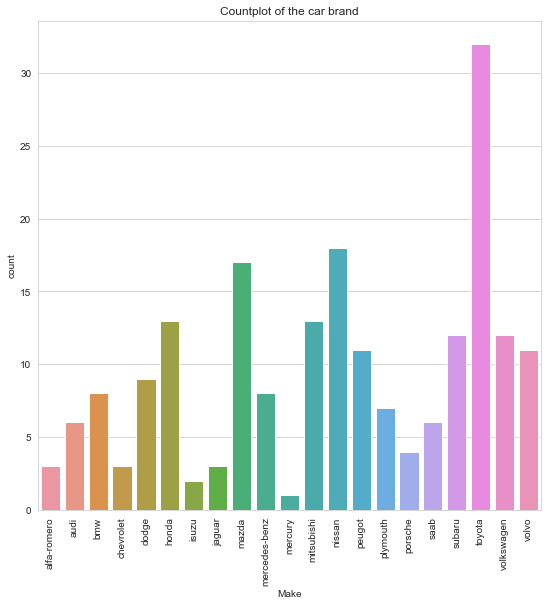

In [23]:
plt.figure(figsize=(9,9))
sns.set_style('whitegrid')
sns.countplot(x = 'Make', data=df)
plt.title('Countplot of the car brand')
plt.xticks(rotation=90)
plt.show()

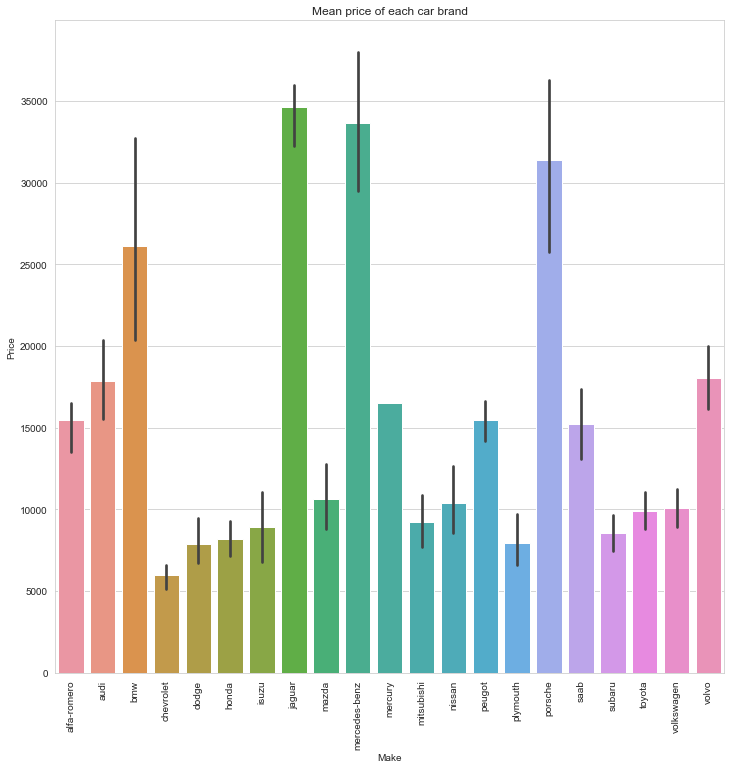

In [24]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.barplot(x = 'Make', y = 'Price', data=df,estimator=np.mean)
plt.title('Mean price of each car brand')
plt.xticks(rotation=90)
plt.show()

In [25]:
df['Make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

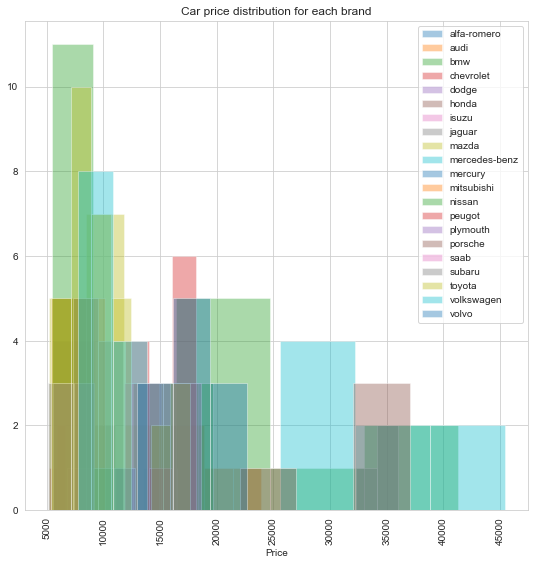

In [26]:
brand = df['Make'].unique()

plt.figure(figsize=(9,9))
sns.set_style('whitegrid')
for i in range (len(brand)):
    sns.distplot(df[df['Make']==brand[i]]['Price'], kde=False)
plt.title ('Car price distribution for each brand')
plt.legend(df['Make'].unique())
plt.xticks(rotation=90)
plt.show()

## Question 1

Do you think there is a relation between the price column and the Make column? Make you reasoning

In [27]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(
        np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),
                                      2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator / denominator)
    return eta

correlation_ratio(df['Make'], df['Price'])

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\series.py:1143: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



nan

In [28]:
z=[]
def normal_tes (data,col, sub):
    print ('QQ Plot')
    import statsmodels.api as sm
    import pylab
    x=data[col].unique()
    for i in range (len(x)):
        sm.qqplot(data[data[col]==x[i]][sub], line='45')
        plt.title('Column :{}'.format(x[i]))
        pylab.show()

## b. Anderson-Darling, Chi-Square, Shapiro

    print ('Normality Test (Parametric) :')
    from scipy.stats import shapiro, normaltest, anderson  
    for k in range (len(x)):
        print ('Column :{}'.format(x[k]))
        result = {'Anderson' : {i:j for i,j in zip(anderson(data[data[col]==x[k]][sub])[2], anderson(data[data[col]==x[k]][sub])[1])}}
        result['Anderson']['stat'] = anderson(data[data[col]==x[k]][sub])[0]
        print(result)
        if any in anderson(data[data[col]==x[k]][sub])[1] > anderson(data[data[col]==x[k]][sub])[0]:
            print ('Distribution : Normal')
            z.append('Normal')
        else :
            print ('Distribution : Non-Normal Distribution')
            z.append('Non-Normal Distribution')
        print('\n')

QQ Plot


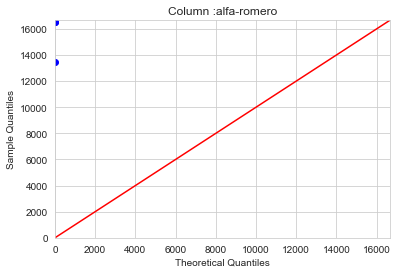

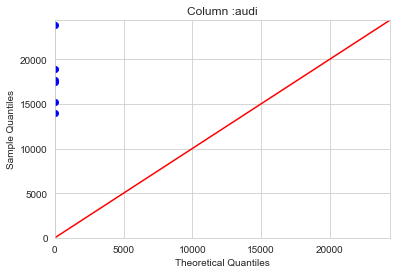

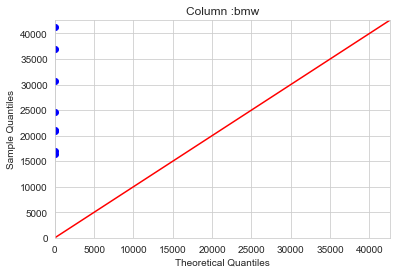

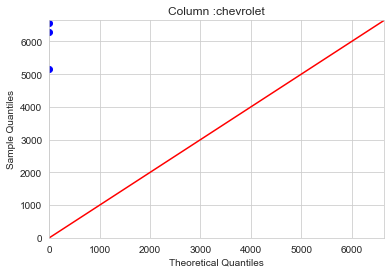

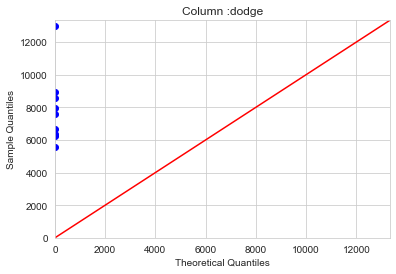

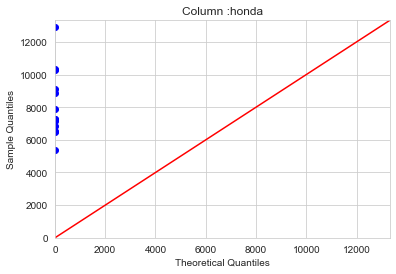

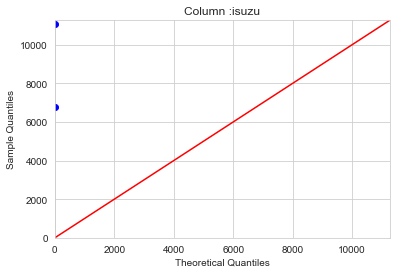

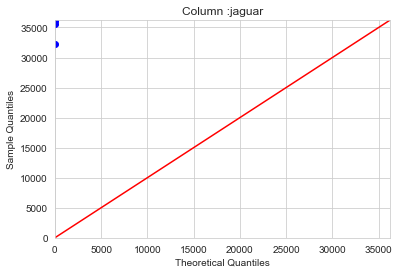

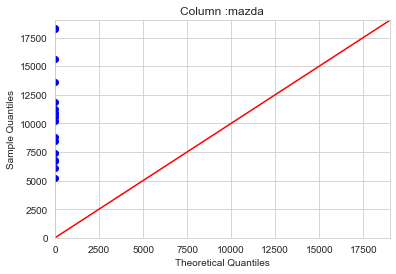

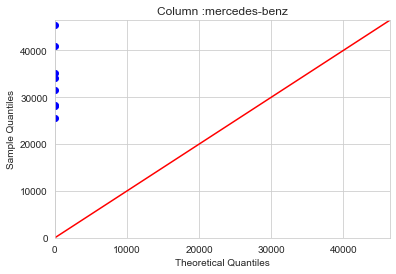

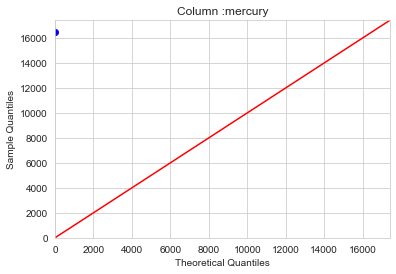

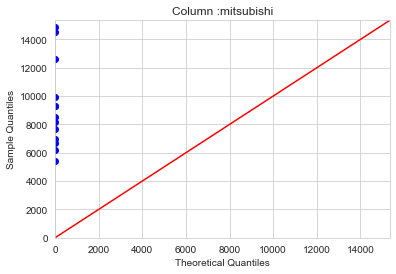

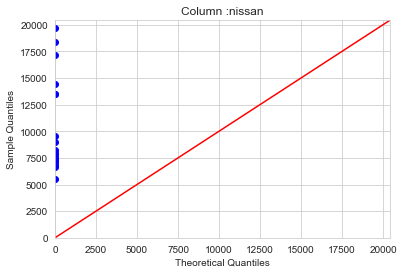

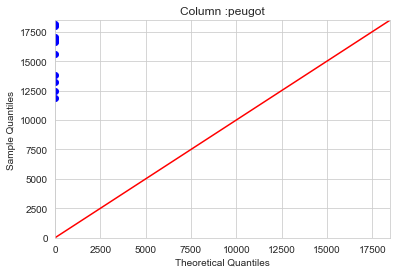

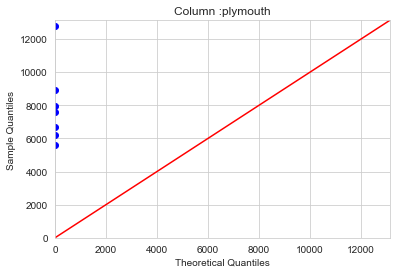

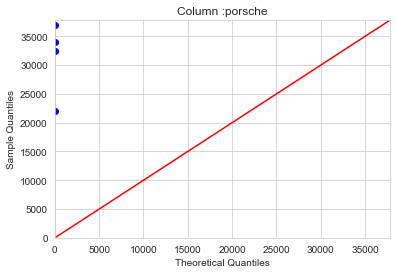

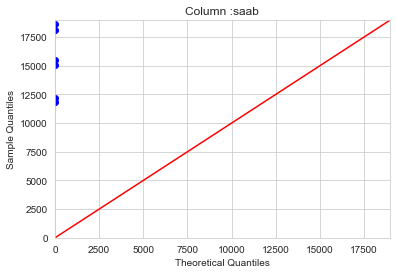

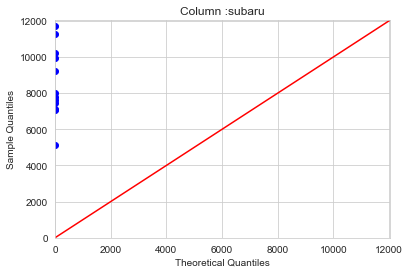

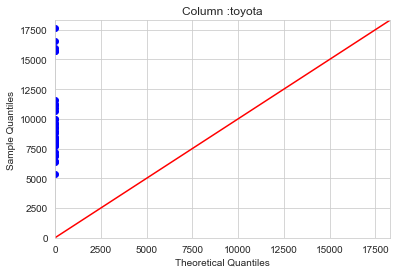

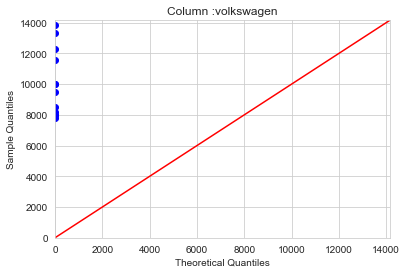

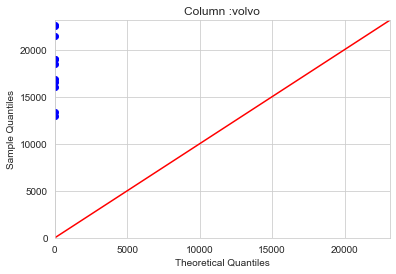

Normality Test (Parametric) :
Column :alfa-romero
{'Anderson': {15.0: -1.296, 10.0: -1.476, 5.0: -1.771, 2.5: -2.065, 1.0: -2.457, 'stat': 0.48776673589398367}}
Distribution : Non-Normal Distribution


Column :audi
{'Anderson': {15.0: 0.592, 10.0: 0.675, 5.0: 0.809, 2.5: 0.944, 1.0: 1.123, 'stat': 0.29503360198711803}}
Distribution : Non-Normal Distribution


Column :bmw
{'Anderson': {15.0: 0.519, 10.0: 0.591, 5.0: 0.709, 2.5: 0.827, 1.0: 0.984, 'stat': 0.36641008164842503}}
Distribution : Non-Normal Distribution


Column :chevrolet
{'Anderson': {15.0: -1.296, 10.0: -1.476, 5.0: -1.771, 2.5: -2.065, 1.0: -2.457, 'stat': 0.3147535772279113}}
Distribution : Non-Normal Distribution


Column :dodge
{'Anderson': {15.0: 0.507, 10.0: 0.578, 5.0: 0.693, 2.5: 0.808, 1.0: 0.961, 'stat': 0.5431018379871144}}
Distribution : Non-Normal Distribution


Column :honda
{'Anderson': {15.0: 0.497, 10.0: 0.566, 5.0: 0.679, 2.5: 0.792, 1.0: 0.942, 'stat': 0.4760883426921154}}
Distribution : Non-Normal Distr

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1869: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1957: RuntimeWarning:

invalid value encountered in less_equal



In [29]:
normal_tes (df,'Make', 'Price')

In [30]:
def kruskal_tes(data,col,sub):
    print('Kruskal Test (Non Normal Distribution, Different Variance, Independet Group)')
    from pingouin import kruskal
    return kruskal(data = data, dv = sub, between = col )

In [31]:
kruskal_tes(df,'Make', 'Price')

Kruskal Test (Non Normal Distribution, Different Variance, Independet Group)


,Source,ddof1,H,p-unc
Kruskal,Make,20,123.295,6.974537e-17


# Answer No. 1

If we look at the statistical solution above, we can see there is no correlation between brand and price. Also we can conclude the price distribution of each brand is different. It happened, because the categorical of brands are not in hierarchy way so there would be a different price distribution for different brand.

But if we see from the graph 'Mean price of each car brand', we can perceived there is 3 categorical of brand which separated by the mean of price. first category is for the brand that sell their car for the expensive price which is BMW, Jaguar, Mercedes-Benz, and Porche. For the second category is for brand that has medium price that consist of alfa-romero, audi, mercury, peugot and volvo. And for the third category is for the rest less expensive or cheap car.

In [32]:
from pingouin import pairwise_ttests
def pairwise_ttes(data,col,sub):
    print('Pairwise T Tes - (Skewed Distribution)')
    return pairwise_ttests(data = data, dv = sub, between = col, parametric = False)

C:\Users\User\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.3.2, the latest is 0.3.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



Create a new column called MPG-difference where the value is coming from the difference between Highway-MPG and City-MPG, then create another column called Car-Area from multipication of Length, Width, and Height columns.

In [33]:
df['MPG-difference'] = df['Highway-MPG'] - df['City-MPG']

In [34]:
df['Car-Area'] = df['Length']*df['Width']*df['Height']

In [35]:
df.head()

,Make,Fuel-Type,Aspiration,Num-of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-difference,Car-Area
0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,6,528019.904
1,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,6,528019.904
2,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6.0,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,7,587592.640
3,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4.0,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,6,634816.956
4,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5.0,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,4,636734.832


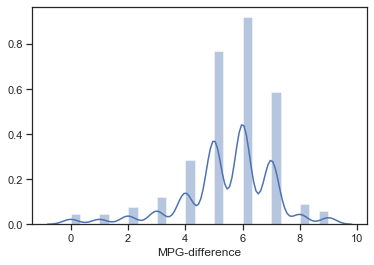

In [36]:
sns.distplot(df['MPG-difference'], kde=True)

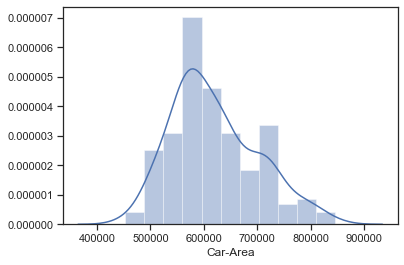

In [37]:
sns.distplot(df['Car-Area'], kde=True)

Now, use the IQR method to find the row outlier based on the MPG-Difference columns

In [38]:
q1, q3= np.percentile(df['MPG-difference'],[25,75])
iqr = q3 -q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

In [39]:
df_outlier = df[(df['MPG-difference']<lower_bound) | (df['MPG-difference']>upper_bound) ]
df_outlier_index = df_outlier.index

In [40]:
df_outlier.describe()

,Num-of-Doors,Wheel-Base,Length,Width,Height,Curb-Weight,Cylinders,Engine-Size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-MPG,Highway-MPG,Price,MPG-difference,Car-Area
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,3.241379,102.193103,180.241379,67.406897,54.551724,2909.896552,5.000000,156.000000,3.465517,3.254483,14.720690,117.448276,4917.241379,24.275862,28.448276,20811.448276,4.172414,666796.701655
std,0.987608,9.094305,13.996671,2.863431,2.301338,616.542163,1.414214,59.221738,0.279676,0.289477,6.748459,47.951304,687.681906,7.449336,8.974512,11905.112919,3.263094,100367.760042
min,2.000000,89.500000,159.100000,64.000000,50.200000,1890.000000,4.000000,91.000000,3.010000,2.640000,7.700000,52.000000,4150.000000,14.000000,16.000000,5195.000000,0.000000,552589.302000
25%,2.000000,95.700000,168.900000,65.000000,52.800000,2300.000000,4.000000,108.000000,3.240000,3.080000,9.000000,73.000000,4500.000000,17.000000,25.000000,9298.000000,2.000000,567911.680000
50%,4.000000,97.300000,175.000000,66.100000,54.900000,2756.000000,4.000000,145.000000,3.580000,3.350000,9.500000,112.000000,4800.000000,23.000000,25.000000,18344.000000,3.000000,629272.000000
75%,4.000000,110.000000,190.900000,70.300000,55.900000,3495.000000,6.000000,183.000000,3.700000,3.400000,21.500000,143.000000,5000.000000,30.000000,31.000000,31600.000000,8.000000,769115.802000
max,4.000000,120.900000,208.100000,72.000000,58.700000,3900.000000,8.000000,308.000000,3.940000,3.640000,23.000000,207.000000,6600.000000,38.000000,47.000000,45400.000000,9.000000,846007.659000


Text(0.5, 1.0, 'Car-Area distribution of thhe outlier')

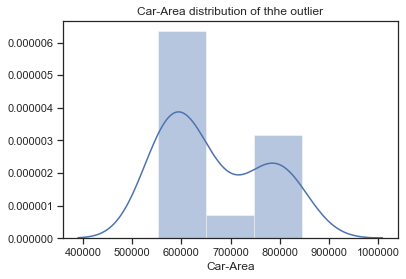

In [41]:
sns.distplot(df_outlier['Car-Area'], kde=True)
plt.title('Car-Area distribution of thhe outlier')

Text(0.5, 1.0, 'Price distribution of thhe outlier')

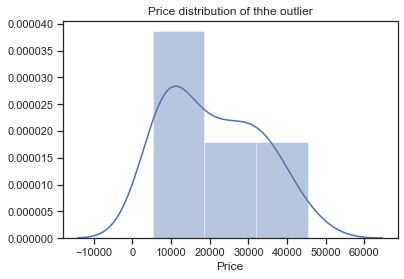

In [42]:
sns.distplot(df_outlier['Price'], kde=True)
plt.title('Price distribution of thhe outlier')


## Question 2

From the describe, and few plots that I see it seems in our outlier based on the MPG-Differences that the car is quite big. Do you agree with my assumption? give me your reasoning

# Answer No. 2

[0.85, 0.15]


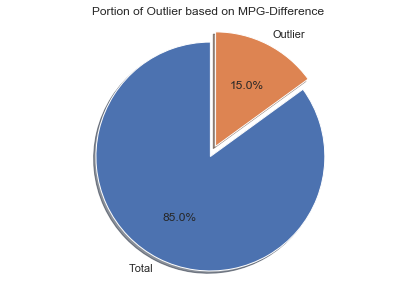

In [43]:
pielabel = ['Total','Outlier']
sizes = []
for i in pielabel:
    if i == 'Total':
        sizes.append (round(((len(df)-len(df_outlier))/len(df)), 2))
    else :
        sizes.append (round((len(df_outlier))/len(df), 2))
explode = (0,0.1)
print(sizes)
        
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=pielabel,autopct='%1.1f%%',explode=explode,
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title("Portion of Outlier based on MPG-Difference ")
plt.show()

From the pie chat above, we can analyze that ratio of outlier per total is 15% from the total data that can summarized quite big.

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

What do you think the feature that really affecting the price? give me your explanation with the data


In [44]:
numerical_col= df.select_dtypes('number').columns
categorical_col= df.select_dtypes('object').columns

In [45]:
corr_ratio = []
for i in categorical_col:
    corr_ratio.append(correlation_ratio(df[i],df['Price']))
    
Corr = pd.DataFrame(data=[categorical_col, corr_ratio]
                   ).T
Corr.columns = ['Column', 'Corr_Ratio']
Corr.sort_values(by='Corr_Ratio', ascending=False)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\series.py:1143: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike



,Column,Corr_Ratio
0,Make,NaN
1,Fuel-Type,NaN
2,Aspiration,NaN
3,Body-Style,NaN
4,Drive-Wheels,NaN
5,Engine-Location,NaN
6,Engine-Type,NaN
7,Fuel-System,NaN


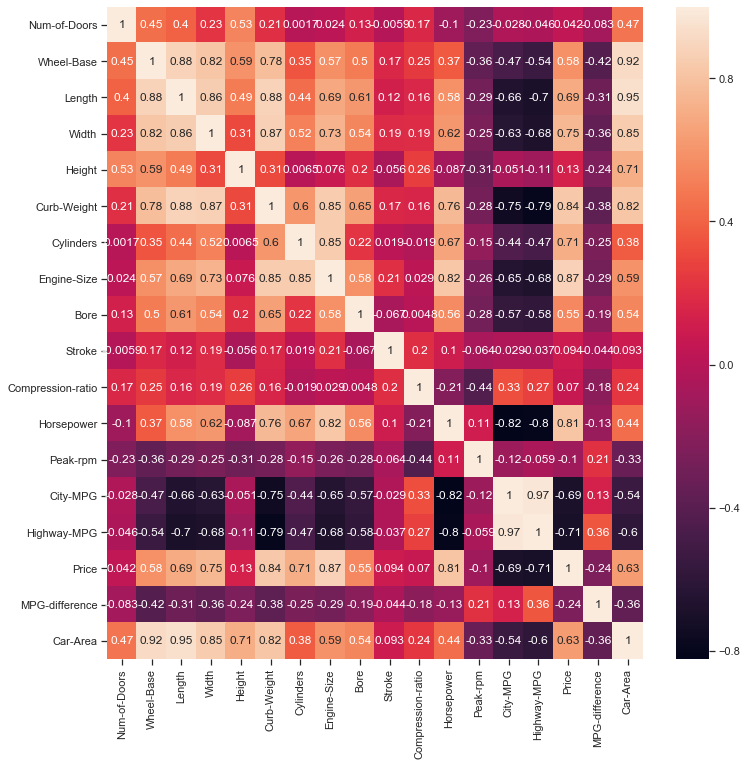

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr('pearson'),annot=True)

In [47]:
from scipy.stats import mannwhitneyu
mann = []
for i in numerical_col:
    if mannwhitneyu(df[df['Price'] <= df['Price'].mean()][i],
                    df[df['Price'] > df['Price'].mean()][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res_mann = pd.DataFrame(
    data=[list(numerical_col), mann]).T
res_mann.columns = ['Columns', 'Hypothesis']
res_mann

,Columns,Hypothesis
0,Num-of-Doors,Fail to Reject Null Hypothesis
1,Wheel-Base,Reject Null Hypothesis
2,Length,Reject Null Hypothesis
3,Width,Reject Null Hypothesis
4,Height,Reject Null Hypothesis
5,Curb-Weight,Reject Null Hypothesis
6,Cylinders,Reject Null Hypothesis
7,Engine-Size,Reject Null Hypothesis
8,Bore,Reject Null Hypothesis
9,Stroke,Fail to Reject Null Hypothesis


## Analysis
After we tes each feature by using statistal method, we can conclude that there is NO categorical feature that affecting the price instead there are several feature from numerical feature that affecting price which is 'Wheel-Base', 'Length', 'Width', 'Height','Curb-Weight', 'Cylinders', 'Engine-Size', 'Bore', 'Horsepower', 'City-MPG', 'Highway-MPG', 'Price', 'MPG-difference', 'Car-Area'.


To create our dashboard, convert your cleaned data as CSV (Just name it as auto_imports_ujian.csv, and don't forget to not including the index) and then export it to your SQL database

In [48]:
df.to_csv(r'C:\Users\User\Documents\Latihan Purwadhika\Modul 2\Perbaikan Modul 2\Ujian_2_Remedial\auto_imports_ujian.csv', index=False, header=True)